## Lectura 3-3: Pruebas de Hipotesis 2.

### Contraste para una proporción

Ahora consideramos la hipótesis nula de que la proporción  
$p_1$, que mide la proporción de una característica  
$A$  en una población, es igual a  $p_2$, que es la proporción de la misma característia en otra población.

$$H_0: p_{1}-p_{2}=0 $$


El estadístico para este caso se escribe, a partir de las proporciones muestrales $\hat{p}_1$  y $\hat{p}_2$  en dos muestras, como:

$$ T=\frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}\cdot(1-p_{0})}{n}}}\ \ \approx \ \ N(0,1). $$

**Ejemplo**

 El portavoz del gobierno de BestKorea ha dicho que más de la mitad de la población está de acuerdo con la aplicación del artículo 155 en una república autónoma rebelde. Una televisión independiente decide realizar una encuesta. De 288 personas encuestadas, 155 son favorables a la aplicación del artículo 155. ¿Ponen en duda estos resultados la publicidad del gobierno?

**Solución**

Llamamos  p= proporción de personas a favor del 155.

El gobierno afirma que $p>0.5$, luego, al no llevar el signo =, esta opción irá en la hipótesis alternativa. Así, el test será:

$$H_0: p\leq 0.5$$

frente a  

$$H_1:p>0.5$$

La forma de tomar la decisión de rechazar la hipótesis nula o no es ver si hay mucha diferencia entre lo que dice la muestra y lo que dice la hipótesis nula.

La hipótesis nula dice que la proporción teórica  
$p_0$  es  $0.5$. La muestra nos da una proporción muestral  
$\hat{p}=155/288=0.538$. Obviamente, este valor difiere de  
0.5, pero ¿mucho, poco, regular? 

La forma de “medir” la diferencia es mediante el estadístico  
T  que, en este caso, es

$$ T=\frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}\cdot (1-p_{0})}{n}}}=\frac{0.538-0.5}{\sqrt{\frac{0.5\cdot (1-0.5)}{n}}}=\frac{0.038}{0.029}=1.28$$
 

El estadístico que se utiliza sigue una distribución aproximadamente normal, quiere esto decir que el  
p-valor no será tan exacto, sino que hay una cierta diferencia, pero nada para asustar.

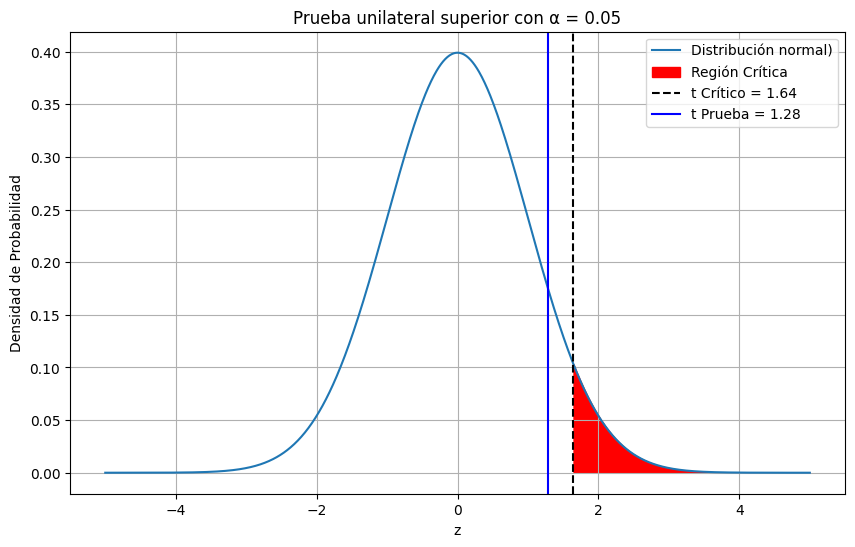

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
alpha = 0.05

t_critico = norm.ppf(1 - alpha)
t_prueba = 1.28  # Aquí pones el valor de tu estadístico de prueba

# Datos para la curva Normal
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"Distribución normal)")

# Rellenar región crítica
plt.fill_between(x, y, where=(x > t_critico), color='red', label="Región Crítica")

# Estadístico crítico y de prueba
plt.axvline(t_critico, color='k', linestyle="--", label=f"t Crítico = {t_critico:.2f}")
plt.axvline(t_prueba, color='blue', linestyle="-", label=f"t Prueba = {t_prueba}")

# Título y leyenda
plt.title(f"Prueba unilateral superior con α = {alpha}")
plt.legend()
plt.xlabel("z")
plt.ylabel("Densidad de Probabilidad")
plt.grid(True)
plt.show()


In [11]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = 155  # Número de éxitos (caras)
nobs = 288  # Número total de intentos
value = 0.5  # Proporción nula

stat, pval = proportions_ztest(count, nobs, value, alternative= 'larger')
print(f'z-statistic: {stat:.2f}')
print(f'p-value: {pval:.4f}')

if pval < 0.05:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

z-statistic: 1.30
p-value: 0.0968
No rechazamos la hipótesis nula.


## Contraste para la diferencia de proporciones

Ahora consideramos la hipótesis nula de que la proporción  $p_1$, que mide la proporción de una característica $A$ en una población, es igual a  
$p_2$ , que es la proporción de la misma característia en otra población.

$$ H_{0}:p_{1}=p_{2}$$
 

El estadístico para este caso se escribe, a partir de las proporciones muestrales  $\hat{p}_1$ y $\hat{p}_2$  en dos muestras, como:

$$ T=\frac{(\hat{p_{1}}-\hat{p_{2}})-(p_{1}-p_{2})}{\sqrt{\frac{\hat{p_{1}}(1-
\hat{p_{1}})}{n_{1}}+\frac{\hat{p_{2}}(1-\hat{p_{2}})}{n_{2}}}}\approx \ \ N(0,1).$$


**Ejemplo**

Para comprobar si interceder ante el altísimo (rezar) por una persona enferma influye o no en una más rápida curación, se llevó a cabo el siguiente experimento: los pacientes que iban a ser operados de cirugía de injerto de derivación arterial coronaria (CABG) serían informados de que habría una serie de voluntarios rezando por una pronta recuperación, de la siguiente forma:  

1201 pacientes fueron informados de que podrían recibir o no oraciones intercediendo por ellos. Estos pacientes se dividieron en  2  grupos A y B de 604  y 597 personas, que recibieron ayuda en forma de rezos (grupo A) y no la recibieron (grupo B) (Es decir, cada persona de cada grupo no sabía si recibía esa ayuda o no).

Un tercer grupo de  601  pacientes fueron informados de que recibirían oraciones intercediendo por ellos, y todos recibieron ayuda de esa manera. Las oraciones duraron 14
  días, empezando a la noche antes de la intervención.

Al cabo de  30  días de la intervención se controló la presencia de complicaciones. Los resultados finalmente fueron

* Complicaciones en el grupo A =  315.
 

* Complicaciones en el grupo B =  304.
 

Complicaciones en el grupo C =  
352.
 

¿Qué conclusiones podemos sacar de estos resultados?


Este estudio puede leerse con detalle en: “Study of the Therapeutic Effects of Intercessory Prayer (STEP) in cardiac bypass patients: A multicenter randomized trial of uncertainty and certainty of receiving intercessory prayer”. American Heart Journal, 2006 151(4):934-42.

Empecemos comparando los que recibieron ayuda con los que no (grupos A y B, respectivamente) y ellos no lo sabían. Las proporciones muestrales son  $\hat{p}_1=315/604=0.52$,  $\hat{p}_2=304/597=0.50$. El contraste que se plantea es  

$$H_0: p_1=p_2$$


  frente a  
$$H_1:p_1\neq p_2$$

Para realizar el contraste en python usamos:



In [15]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Datos
count = np.array([315, 304])
nobs = np.array([604, 597])

# Realizar el test de proporciones
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print(f'z-statistic: {z_stat}')
print(f'p-value: {p_value}')


z-statistic: 0.426819445261816
p-value: 0.669510842137018



Comprobamos que el  p -valor para este contraste es 0.426819445261816, lo cual significa que no podemos rechazar la hipótesis nula. Esto quiere decir que rezar (o no rezar) por una tercera persona es indiferente (si esa tercera persona no lo sabe).



Ahora comparemos los grupos A y B (no saber si rezan por ti) en conjunto, con el C (sabes que rezan por ti).

Las proporciones muestrales son:

$$\hat{p}_1=\dfrac{315+304}{604+597}=\dfrac{619}{1201}=0.51 \ y \ \hat{p}_2=\dfrac{352}{601}=0.58.$$
 

De nuevo, planteamos el contraste 

$$H_0: p_1=p_2$$


  frente a  
$$H_1:p_1\neq p_2$$



In [16]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Datos
count = np.array([619, 352])
nobs = np.array([1201, 601])

# Realizar el test de proporciones
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print(f'z-statistic: {z_stat}')
print(f'p-value: {p_value}')


z-statistic: -2.8219484176705523
p-value: 0.0047732854071703265



Se obtiene que el  p-valor es prácticamente cero, es decir, que se puede rechazar la hipótesis de que las proporciones no son iguales. Con lo que convendríamos que es mejor que sepas que rezan por tí, que no sepas si lo hacen o no.



### Contraste para el cociente de varianzas


Si se quiere contrastar que la proporción de las varianzas de las  2  variables $X$ e $Y$ es igual a un número concreto (una constante):

$$ H_{0}:\frac{\sigma _{2}^{2}}{\sigma_{1}^{2}}=cte,$$

se utiliza el siguiente estimador:

$$ T=\frac{\hat{S}_{n-1}^{2}\sigma _{2}^{2}}{\hat{S}_{m-1}^{2}\sigma _{1}^{2}}\
\ \in \ \ F_{n-1,m-1}.$$


Fijémonos que, si lo que interesa es contrastar si las 2 variables tienen la misma varianza, entonces esa constante es igual a 1, de manera que el estadístico será:

$$ T=\frac{\hat{S}_{n-1}^{2} }{\hat{S}_{m-1}^{2} }\
\ \in \ \ F_{n-1,m-1},$$

esto es, hacer el cociente entre las cuasi-varianzas muestrales. Ese estadístico (si la hipótesis nula de que las varianzas teóricas son iguales es cierta) sigue una distribución $F$ de Fisher-Snedecor de  $n−1$  y $m−1$ grados de libertad.


**Ejemplo**

Con los siguientes datos contrastar si las varianzas de las variables originales pueden considerarse iguales o no.

* $x=(104,88,100,98,102,92,96,100,96,96)$


* $y=(100,102,96,106,110,110,120,112,112,90)$


In [18]:
import numpy as np
from scipy.stats import f

x = [104, 88, 100, 98, 102, 92, 96, 100, 96, 96]
y = [100, 102, 96, 106, 110, 110, 120, 112, 112, 90]

# Compute the variance for both samples
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)

# Calculate the F statistic
F = var_x / var_y

# Degrees of freedom
df1 = len(x) - 1
df2 = len(y) - 1

# Calculate the two-tailed p-value
p = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

print(f'F = {F:.4f}, p-value = {p:.4f}')


F = 0.2849, p-value = 0.0754


En este caso, el  p-valor del test es  0.075. Atendiendo al valor estándar 0.05 de decisión, no podriamos decir que las varianzas son diferentes.

### Conclusiones

### Un valor p es sólo una prueba del tamaño de la muestra

- Léelo otra vez: ¡lo digo en serio! Si la hipótesis nula no se cumple (y las hipótesis nulas nunca se cumplen en la vida real), cuanto mayor sea el tamaño de la muestra, más pequeño tenderá a ser el p-valor.

- Si estás probando si la media es igual a 0 y la verdad es que la media es igual a 0.000000001, y si tienes un tamaño de muestra lo suficientemente grande, entonces OBTENDRÁS UN VALOR P PEQUEÑO.

- **¿Qué importancia tiene esto?** En muchos entornos contemporáneos (pensemos en Internet), el tamaño de las muestras es tan grande que podemos obtener valores p PEQUEÑOS incluso cuando la desviación de la hipótesis nula es insignificante. En otras palabras, podemos tener significación ESTADÍSTICA sin significación PRÁCTICA.

- A menudo, la gente se centra en ese minúsculo valor p, y el hecho de que el efecto no tiene ninguna relevancia práctica se pierde por completo.

- Esto también significa que con un tamaño de muestra lo suficientemente grande podemos rechazar básicamente CUALQUIER hipótesis nula (ya que la hipótesis nula nunca se cumple exactamente en la vida real, pero puede estar "lo suficientemente cerca" como para que la violación de la hipótesis nula no sea importante).

- ¿Quieres escribir un artículo diciendo que el consumo de Lucky Charms está correlacionado con el tipo de sangre? Con una muestra lo suficientemente grande, puede obtener un valor p pequeño. (Siempre que haya un mecanismo muy complicado con un tamaño de efecto minúsculo... que probablemente lo haya, ya que la hipótesis nula IRL nunca se cumple).


### busca y encontrarás

- Si observas tus datos durante el tiempo suficiente, encontrarás algo interesante, ¡aunque sólo sea por casualidad!

- En principio, sabemos que necesitamos realizar una corrección para pruebas múltiples si llevamos a cabo un montón de pruebas.

- Pero en la práctica, ¿qué ocurre si decidimos qué prueba(s) realizar DESPUÉS de observar los datos? Nuestro valor p será engañosamente pequeño porque hemos echado un vistazo a los datos. Especificar de antemano nuestro plan de análisis nos mantiene honestos... pero en realidad, ¡¡¡es difícil de hacer!!!


